In [1]:
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
# sys.path = ['/hps/nobackup/research/stegle/users/willj/GTEx/deps/qvalue/qvalue'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
import os
%matplotlib inline
from qvalue.qvalue import estimate as qestimate
from scipy.stats import pearsonr
import seaborn

In [3]:
tissue = 'Lung'
[X_matrix, y_pheno] = pickle.load(open('../data/processed/association_data/expression/inception_50_-1.h5/small/{}/X_y_mean'.format(tissue),'rb'))

# Distributions of all image features

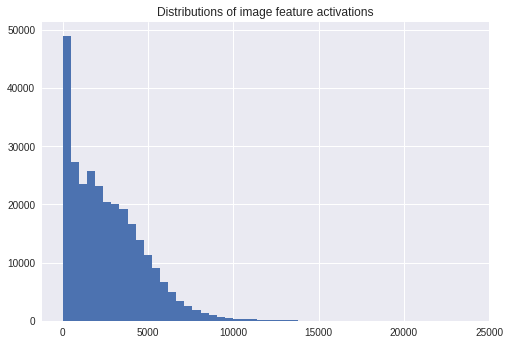

In [39]:
plt.hist(y_pheno.flatten(), bins=50)
plt.title("Distributions of image feature activations")
plt.show()

# Distribution of individual image feature vectors

In [43]:
from statsmodels.graphics.gofplots import qqplot

In [ ]:
a[0][4].scatter([-math.log(x,10) for x in expected_real], [-math.log(x,10) for x in sample_real], s=3)
a[0][4].plot(np.linspace(0,8,100), np.linspace(0,8,100), c='red')

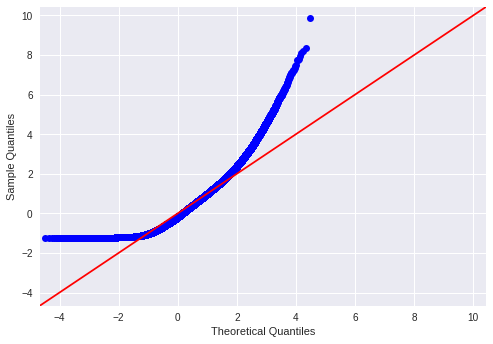

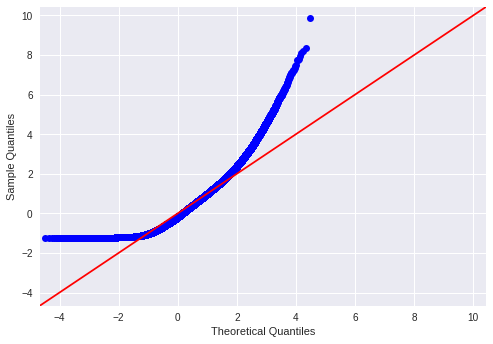

In [46]:
qqplot(y_pheno.flatten(),fit=True,line='45')

# Plotting the distributions of individual image features

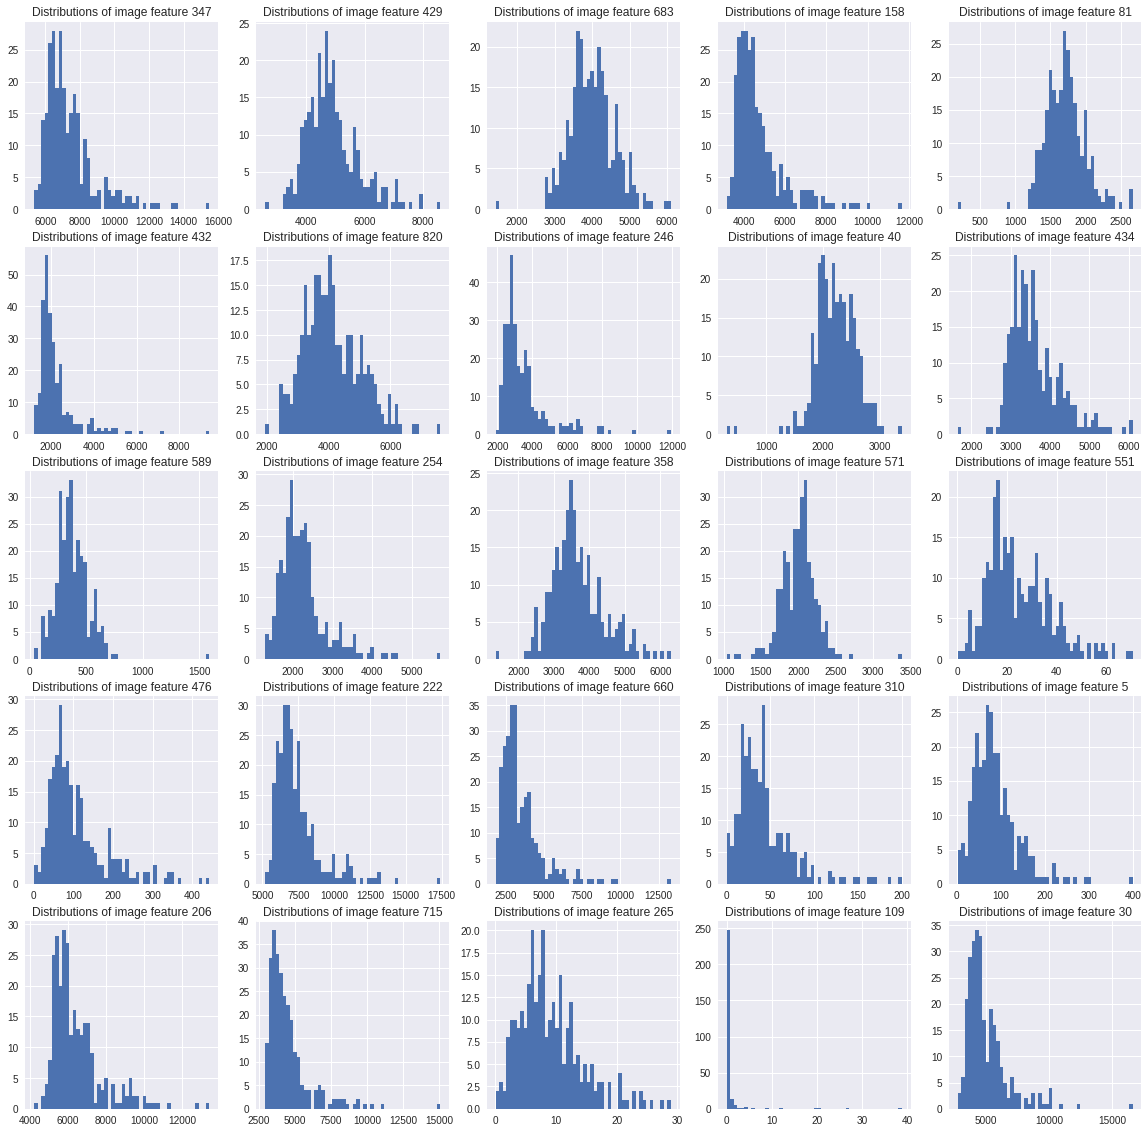

In [42]:
f,a = plt.subplots(5,5, figsize=(20,20))
options = np.random.choice(range(1024), 25)
for i in range(len(options)):
    a.flatten()[i].hist(y_pheno[:,options[i]], bins=50)
    a.flatten()[i].set_title("Distributions of image feature {}".format(options[i]))
plt.show()


Summary: Distriubtions are close to normal but extreme values are present. 

# Normalise with a sigmoid

In [49]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

(array([  5.74000000e+02,   2.64000000e+02,   2.13000000e+02,
          1.93000000e+02,   2.02000000e+02,   1.79000000e+02,
          1.86000000e+02,   2.38000000e+02,   3.86000000e+02,
          2.81213000e+05]),
 array([ 0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
         0.95,  1.  ]),
 <a list of 10 Patch objects>)

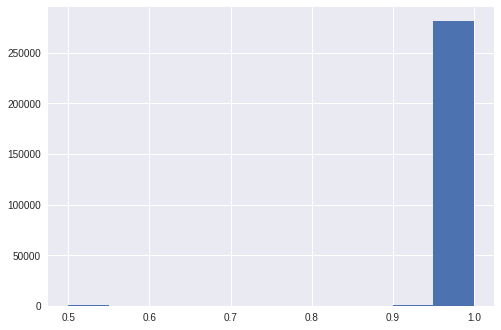

In [52]:
plt.hist(sigmoid(y_pheno.flatten()))